In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("insurance.csv")

data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
d_types = dict(data.dtypes)
for name , type_ in d_types.items():
    if str(type_) == 'object':
        print(f"<======== {name} ===========>")
        print(data[name].value_counts())
        print()

<======== sex ===========>
male      676
female    662
Name: sex, dtype: int64

<======== smoker ===========>
no     1064
yes     274
Name: smoker, dtype: int64

<======== region ===========>
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



In [7]:
from sklearn.preprocessing import LabelEncoder

for name , type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])

In [8]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
part = onehotencoder.fit_transform(data['region'].values.reshape(-1,1)).toarray()

values = dict(data["region"].value_counts())

for e , (val , _) in enumerate(values.items()):
    data["region_" + str(val)] = part[:,e]

data = data.drop(["region"] , axis = 1)

data.head()

,age,sex,bmi,children,smoker,expenses,region_2,region_3,region_1,region_0
0,19,0,27.9,0,1,16884.92,0.0,0.0,0.0,1.0
1,18,1,33.8,1,0,1725.55,0.0,0.0,1.0,0.0
2,28,1,33.0,3,0,4449.46,0.0,0.0,1.0,0.0
3,33,1,22.7,0,0,21984.47,0.0,1.0,0.0,0.0
4,32,1,28.9,0,0,3866.86,0.0,1.0,0.0,0.0


Skewness in Column : Sqrt Expenses  -0.008734062011873602


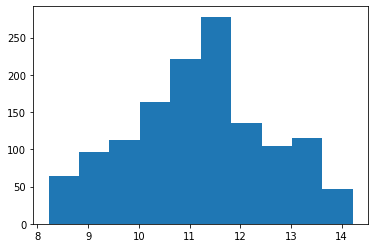

In [9]:
from scipy import stats 

col_cox , lam = stats.boxcox(data["expenses"])[0:2]
print("Skewness in Column : Sqrt Expenses " ,pd.Series(col_cox).skew())

plt.hist(col_cox)
plt.show()

In [10]:
data["expenses"] = col_cox

In [11]:
remaining_columns = list(data.columns)
remaining_columns.remove("expenses")

In [12]:
X = data[remaining_columns].values 
Y = data['expenses'].values

In [13]:
from sklearn.model_selection import train_test_split

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [14]:
from sklearn.linear_model import Ridge , Lasso , ElasticNet , LinearRegression

In [15]:
model = LinearRegression()
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))

 Training Accuracy :  0.7749547304018276
 Testing Accuracy :  0.7497079440424593


In [16]:
model = Ridge()
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))

 Training Accuracy :  0.7749377189073672
 Testing Accuracy :  0.7502904376174959


In [17]:
model = Lasso()
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))

 Training Accuracy :  0.2589359547500544
 Testing Accuracy :  0.2841101128580016


In [18]:
# Elastic 

# lambda_1*L1 + lambda_2*L2 
# alpha = lambda_1 + lambda_2 , l1_ratio = lambda_1/(lambda_1 + lambda_2)

model = ElasticNet()
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))

 Training Accuracy :  0.26553917703322805
 Testing Accuracy :  0.2906976260872923


Changing Parameter for Lasso and ElasticNet

In [19]:
model = Lasso(alpha = 0.01)
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))

 Training Accuracy :  0.7733046323058576
 Testing Accuracy :  0.7516010885977983


In [20]:
# Elastic 

# lambda_1*L1 + lambda_2*L2 
# alpha = lambda_1 + lambda_2 , l1_ratio = lambda_1/(lambda_1 + lambda_2)

model = ElasticNet(alpha = 0.01 + 0.01 , l1_ratio = 0.01/(0.01 + 0.01))
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))

 Training Accuracy :  0.7698503985770702
 Testing Accuracy :  0.753105498575783
